<a href="https://colab.research.google.com/github/hmead15/DS-Unit-1-Build/blob/master/BW1_NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#**My research question**: Are NFL offenses moving away from running in favor of passing?

*Ho1*: There has not been a statistically significant decline of a team's run/pass ratio in terms of total yards and play calling.

*Ha1*: – There has been a statistically significant decline of a team's run/pass ratio in terms of total yards, as measured by the ratio of rush yards to total yards and the ratio of running plays to total plays.

##**Follow on question**: Are running backs declining in the value they bring to the team?

*Ho2*: “Top rushers” (the league's top 32 rushers) get as. many. "carries" and rush for the same amount of yards as they did in the past.

*Ha2*: “Top rushers” (the league's top 32 rushers) get significantly fewer "carries," and rush for the fewer yards as they did in the past.

##**Follow on question**: Are offenses de-investing in their running backs?

*Ho3*: Offenses are investing the same amount in their running backs as they have been for forty years.

*Ha3*: Offenses are de-investing in their running backs, both in terms of draft strategy and salary apportionment.

#Data Needed:

Ho1/Ha1: nfl dataset: rush yards, total yards, every team for the past 40 years.

Ho2/Ha2: RB dataset: rush yards, carries, top 31 rushers for the past 20 years.

Ho3/Ha3: Draft pick database, **can't find free datasets on salaries, so I may have to scrap this Follow-on or use the Draft database more**

##General Questions so far

Groupby method - I want to take yearly averages and value counts (nfl ['Year'], RB ['Year'], Draft ['Year']) of stats

*   I also want to examine subsets based on nfl ['Rk'], i.e. look into trends happening among the top offenses. Also, I may want to grab the best 5 RBs of each year, and I purposefully left off a 'Rank' column for them.

*   Hard-coding values. 

> * Example 1: I need to research and obtain the total number of draft picks for every year, then I will divide the number of RBs picked by that number. The problem is, that number is different year to year, set by a proprietary formula.


> * Example 2: I want to upload and merge a dataframe of super bowl winners (and maybe playoiff participants) for each year, but the shapes won't be the same, so I want to use an if statement or hard code a NO/False or YES/True value for the appropriate teams



*   (Playing with 'hover'? and visualizations?)

*   Github raw links keep giving me 404:Not Found errors




# Q1: Are offenses moving away from running?
## Looking at: Rush_Ratio by year

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/hmead15/BW1-NFL/master/BW%20NFL%20offense.csv?token=APICJL4POQSUS4NGHPAMAES7IUSAU')

In [4]:
nfl = df['Rk'],df['Tm'],df['Ps_TD'],df['Tot_Yds'],df['Rush_Att'],df['Rush_Yds'],df['Rush_TD'],df['Year']
#these are what I care about 

In [6]:
nfl = pd.DataFrame(nfl).T

In [7]:
print(nfl.shape)
nfl.head()

(1237, 8)


,Rk,Tm,Ps_TD,Tot_Yds,Rush_Att,Rush_Yds,Rush_TD,Year
0,1,Baltimore Ravens,37,6521,596,3296,21,2019
1,2,San Francisco 49ers,28,6097,498,2305,23,2019
2,3,Tampa Bay Buccaneers,33,6366,409,1521,15,2019
3,4,New Orleans Saints,36,5982,405,1738,12,2019
4,5,Kansas City Chiefs,30,6067,375,1569,16,2019


In [8]:
nfl.dtypes 

Rk          object
Tm          object
Ps_TD       object
Tot_Yds     object
Rush_Att    object
Rush_Yds    object
Rush_TD     object
Year        object
dtype: object

In [9]:
nfl.Rk = nfl.Rk.astype(str).astype(int)
nfl.Tot_Yds = nfl.Tot_Yds.astype(str).astype(int)
nfl.Rush_Att = nfl.Rush_Att.astype(str).astype(int)
nfl.Rush_Yds = nfl.Rush_Yds.astype(str).astype(int)
nfl.Rush_TD = nfl.Rush_TD.astype(str).astype(int)
nfl.Ps_TD = nfl.Ps_TD.astype(str).astype(int)
nfl.Year = nfl.Year.astype(str).astype('category')
nfl.dtypes

Rk             int64
Tm            object
Ps_TD          int64
Tot_Yds        int64
Rush_Att       int64
Rush_Yds       int64
Rush_TD        int64
Year        category
dtype: object

In [30]:
nfl['Rush_Ratio'] = nfl['Rush_Yds']/nfl['Tot_Yds']
nfl['Rush_TD_Diff'] = nfl['Rush_TD'] - nfl['Ps_TD']
nfl.drop(nfl['Ps_TD']) #no longer need

,Rk,Tm,Ps_TD,Tot_Yds,Rush_Att,Rush_Yds,Rush_TD,Year,Rush_Ratio,Rush_TD_Diff,num_teams
0,1,Baltimore Ravens,37,6521,596,3296,21,2019,0.505444,-16,NaN
1,2,San Francisco 49ers,28,6097,498,2305,23,2019,0.378055,-5,NaN
2,3,Tampa Bay Buccaneers,33,6366,409,1521,15,2019,0.238926,-18,NaN
3,4,New Orleans Saints,36,5982,405,1738,12,2019,0.290538,-24,NaN
4,5,Kansas City Chiefs,30,6067,375,1569,16,2019,0.258612,-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1232,24,Minnesota Vikings,23,4903,487,1764,9,1979,0.359780,-14,NaN
1233,25,Green Bay Packers,15,4542,483,1861,14,1979,0.409731,-1,NaN
1234,26,Kansas City Chiefs,7,3976,569,2316,18,1979,0.582495,11,NaN
1235,27,New York Giants,15,3774,498,1820,12,1979,0.482247,-3,NaN


In [33]:
nfl.drop(['num_teams'],axis=1)

,Rk,Tm,Ps_TD,Tot_Yds,Rush_Att,Rush_Yds,Rush_TD,Year,Rush_Ratio,Rush_TD_Diff
0,1,Baltimore Ravens,37,6521,596,3296,21,2019,0.505444,-16
1,2,San Francisco 49ers,28,6097,498,2305,23,2019,0.378055,-5
2,3,Tampa Bay Buccaneers,33,6366,409,1521,15,2019,0.238926,-18
3,4,New Orleans Saints,36,5982,405,1738,12,2019,0.290538,-24
4,5,Kansas City Chiefs,30,6067,375,1569,16,2019,0.258612,-14
...,...,...,...,...,...,...,...,...,...,...
1232,24,Minnesota Vikings,23,4903,487,1764,9,1979,0.359780,-14
1233,25,Green Bay Packers,15,4542,483,1861,14,1979,0.409731,-1
1234,26,Kansas City Chiefs,7,3976,569,2316,18,1979,0.582495,11
1235,27,New York Giants,15,3774,498,1820,12,1979,0.482247,-3


In [25]:
# I need to find:
  # the annual average 'Rush_Ratio'
  # the annual average 'Rush_TD

# Then, I want to just look at the top 5 teams for 
# each Year

In [27]:
nfl.Year.value_counts()

2019    32
2009    32
2002    32
2003    32
2004    32
2005    32
2006    32
2007    32
2008    32
2010    32
2011    32
2012    32
2013    32
2014    32
2015    32
2016    32
2017    32
2018    32
2000    31
1999    31
2001    31
1997    30
1996    30
1995    30
1998    30
1986    28
1980    28
1981    28
1982    28
1983    28
1984    28
1985    28
1989    28
1987    28
1988    28
1990    28
1991    28
1992    28
1993    28
1994    28
1979    28
Name: Year, dtype: int64

In [34]:
#not sure how to use the "groupby" method 
grouped = nfl.groupby('Year')
#possibly a for loop, taking the sum of "Rush_Ratio" for each observation
# in a given year, and dividing by the number of observations for that year

In [15]:
grouped.head()

,Rk,Tm,Ps_TD,Tot_Yds,Rush_Att,Rush_Yds,Rush_TD,Year,Rush_Ratio,Rush_TD_Diff
0,1,Baltimore Ravens,37,6521,596,3296,21,2019,0.505444,-16
1,2,San Francisco 49ers,28,6097,498,2305,23,2019,0.378055,-5
2,3,Tampa Bay Buccaneers,33,6366,409,1521,15,2019,0.238926,-18
3,4,New Orleans Saints,36,5982,405,1738,12,2019,0.290538,-24
4,5,Kansas City Chiefs,30,6067,375,1569,16,2019,0.258612,-14
...,...,...,...,...,...,...,...,...,...,...
1209,1,Pittsburgh Steelers,26,6258,561,2603,25,1979,0.415948,-1
1210,2,San Diego Chargers,24,5583,481,1668,25,1979,0.298764,1
1211,3,New England Patriots,30,5470,604,2252,16,1979,0.411700,-14
1212,4,Seattle Seahawks,20,5557,500,1967,24,1979,0.353968,4


In [37]:
nfl_2 = grouped.aggregate(np.sum)

In [38]:
nfl_2['num_teams'] = nfl.Year.value_counts()

In [42]:
nfl_2 
#Need to take all values in Rush_Ratio and divide by no. of teams
#Not all seasons had 32 teams
#nfl['Year'].value_counts()

#Having some trouble 'selecting' columns, post-Groupby

nfl_2['avg_rush_attempts'] = nfl_2['Rush_Att']/nfl_2['num_teams']
nfl_2['avg_rush_yards'] = nfl_2['Rush_Yds']/nfl_2['num_teams']
nfl_2['avg_rush_ratio'] = nfl_2['Rush_Ratio']/nfl_2['num_teams']
nfl_2['avg_rush_td_diff'] = nfl_2['Rush_TD_Diff']/nfl_2['num_teams']
nfl_2['avg_rush_yards'] = nfl_2['Rush_Yds']/nfl_2['num_teams']


nfl_2

,Rk,Ps_TD,Tot_Yds,Rush_Att,Rush_Yds,Rush_TD,Rush_Ratio,Rush_TD_Diff,num_teams,avg_rush_yards,avg_rush_attempts,avg_rush_ratio,avg_rush_td_diff
Year,,,,,,,,,,,,,
1979,406,538,141542,15183,60733,487,12.109074,-51,28,2169.035714,542.250000,0.432467,-1.821429
1980,406,606,144923,14384,57135,431,11.069233,-175,28,2040.535714,513.714286,0.395330,-6.250000
1981,406,591,149857,14508,58304,441,10.952986,-150,28,2082.285714,518.142857,0.391178,-5.357143
1982,406,320,79935,7763,29679,231,10.487957,-89,28,1059.964286,277.250000,0.374570,-3.178571
1983,406,625,149795,14211,58122,437,10.904212,-188,28,2075.785714,507.535714,0.389436,-6.714286
1984,406,615,147741,13811,55503,410,10.598198,-205,28,1982.250000,493.250000,0.378507,-7.321429
1985,406,598,147591,13636,55969,443,10.644002,-155,28,1998.892857,487.000000,0.380143,-5.535714
1986,406,586,145253,13509,53172,401,10.333382,-185,28,1899.000000,482.464286,0.369049,-6.607143
1987,406,611,137690,13189,52044,361,10.588041,-250,28,1858.714286,471.035714,0.378144,-8.928571


In [49]:
nfl_3 = nfl_2.avg_rush_attempts, nfl_2.avg_rush_ratio, nfl_2.avg_rush_td_diff, nfl_2.avg_rush_yards
pd.DataFrame(nfl_3)

Year,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
avg_rush_attempts,542.250000,513.714286,518.142857,277.250000,507.535714,493.250000,487.000000,482.464286,471.035714,485.035714,466.714286,444.357143,438.535714,438.964286,453.000000,448.214286,439.966667,453.133333,454.633333,452.266667,437.032258,441.193548,440.838710,440.687500,453.375000,450.875000,449.218750,451.468750,437.062500,441.218750,440.250000,435.000000,436.59375,435.156250,433.468750,427.750000,421.500000,416.281250,429.843750,414.750000,418.343750
avg_rush_ratio,0.432467,0.395330,0.391178,0.374570,0.389436,0.378507,0.380143,0.369049,0.378144,0.378840,0.354232,0.370027,0.350590,0.373500,0.356379,0.331324,0.330857,0.345155,0.358976,0.355383,0.335015,0.354754,0.352874,0.354373,0.370971,0.359576,0.358475,0.365218,0.343358,0.357494,0.352624,0.341903,0.34263,0.335477,0.325236,0.320748,0.310038,0.311698,0.329845,0.328152,0.324459
avg_rush_td_diff,-1.821429,-6.250000,-5.357143,-3.178571,-6.714286,-7.321429,-5.535714,-6.607143,-8.928571,-4.714286,-6.928571,-7.071429,-5.464286,-6.535714,-7.607143,-8.678571,-9.266667,-8.733333,-7.766667,-9.300000,-9.741935,-7.161290,-8.709677,-7.312500,-7.093750,-9.875000,-6.656250,-7.000000,-10.437500,-5.312500,-8.781250,-11.000000,-10.78125,-11.125000,-12.312500,-13.343750,-14.906250,-10.718750,-11.281250,-12.750000,-10.937500
avg_rush_yards,2169.035714,2040.535714,2082.285714,1059.964286,2075.785714,1982.250000,1998.892857,1899.000000,1858.714286,1942.678571,1844.500000,1821.857143,1722.750000,1768.178571,1760.535714,1668.214286,1729.533333,1743.533333,1808.666667,1803.100000,1703.838710,1800.935484,1788.387097,1858.093750,1885.656250,1865.906250,1799.468750,1876.906250,1774.687500,1855.312500,1866.843750,1831.468750,1874.31250,1854.656250,1806.093750,1781.312500,1741.375000,1742.593750,1755.312500,1831.281250,1806.437500


In [56]:
nfl_3=pd.DataFrame(nfl_3).T
nfl_3

,avg_rush_attempts,avg_rush_ratio,avg_rush_td_diff,avg_rush_yards
Year,,,,
1979,542.250000,0.432467,-1.821429,2169.035714
1980,513.714286,0.395330,-6.250000,2040.535714
1981,518.142857,0.391178,-5.357143,2082.285714
1982,277.250000,0.374570,-3.178571,1059.964286
1983,507.535714,0.389436,-6.714286,2075.785714
1984,493.250000,0.378507,-7.321429,1982.250000
1985,487.000000,0.380143,-5.535714,1998.892857
1986,482.464286,0.369049,-6.607143,1899.000000
1987,471.035714,0.378144,-8.928571,1858.714286


In [204]:
nfl_4 = pd.DataFrame({'x': nfl_3.index.values.astype(str), 'y1':nfl_3['avg_rush_attempts'], 'y2':nfl_3['avg_rush_yards'], 'y3':nfl_3['avg_rush_ratio'], 'y4':nfl_3['avg_rush_td_diff']})

In [150]:
nfl_4.columns

Index(['x', 'y1', 'y2', 'y3', 'y4'], dtype='object')

In [180]:
def abbr_yr(cell):
  return "'"+cell[2:4]

In [199]:
nfl_4['x'] = nfl_4['x'].apply(abbr_yr)

In [212]:
nfl_5 = nfl_4.copy()
nfl_5 = nfl_5.drop(['1982'])
nfl_5['x'] = nfl_5['x'].apply(abbr_yr)

In [213]:
nfl_5

,x,y1,y2,y3,y4
Year,,,,,
1979,'79,542.250000,2169.035714,0.432467,-1.821429
1980,'80,513.714286,2040.535714,0.395330,-6.250000
1981,'81,518.142857,2082.285714,0.391178,-5.357143
1983,'83,507.535714,2075.785714,0.389436,-6.714286
1984,'84,493.250000,1982.250000,0.378507,-7.321429
1985,'85,487.000000,1998.892857,0.380143,-5.535714
1986,'86,482.464286,1899.000000,0.369049,-6.607143
1987,'87,471.035714,1858.714286,0.378144,-8.928571
1988,'88,485.035714,1942.678571,0.378840,-4.714286


In [103]:
import seaborn as sns

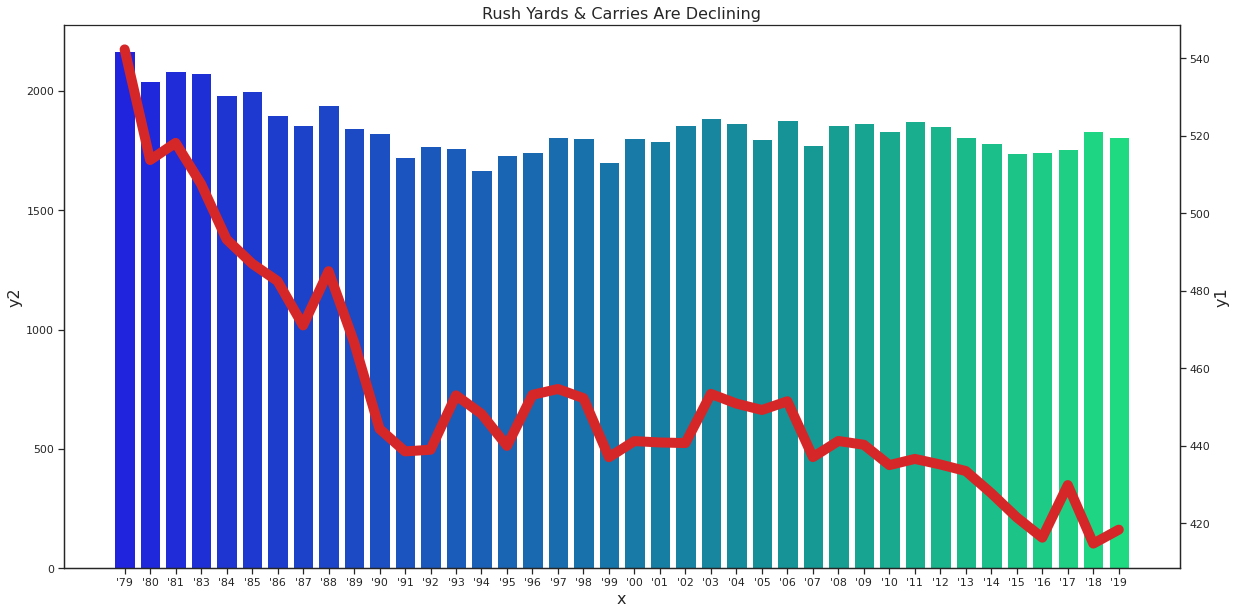

In [235]:
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
#bar plot creation
ax1.set_title('Rush Yards & Carries Are Declining', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Total Rush Yards (League Avg)', fontsize=16)
ax1 = sns.barplot(nfl_5['x'], nfl_5['y2'], palette='winter')
ax2 = ax1.twinx()
color = 'tab:red'
ax1 = ax1.spines['top'].set_visible(False)
#line plot creation

ax2.set_ylabel('Total Carries (League Avg)', fontsize=16)
ax2 = sns.lineplot(nfl_5['x'], nfl_5['y1'], sort=False, color=color)
#ax2 = sns.set(style="ticks", rc={"lines.linewidth": 10})
#ax2.tick_params(axis=nfl_4['y2'], color=color)
#show plot
plt.show()

This is unimpressive, partly because of the rise of running QBs, which push up numbers. I believe subtracting QB statistics will not undermine validity, so I do so here:

In [239]:
scramblers = pd.read_csv('https://raw.githubusercontent.com/hmead15/BW1-NFL/master/QB%20Runners.csv?token=APICJL4LYZNDAKOOFBHBAHS7IVCVI',encoding='latin-1')
scramblers.head()

,Rk,Player,Year,Age,Tm,Att,Yds,Y/A,TD,Y/G
0,1,Lamar Jackson,2019,22,BAL,176,1206,6.85,7,80.4
1,34,Kyler Murray,2019,22,ARI,93,544,5.85,4,34.0
2,42,Josh Allen,2019,23,BUF,109,510,4.68,9,31.9
3,73,Deshaun Watson,2019,24,HOU,82,413,5.04,7,27.5
4,103,Gardner Minshew II,2019,23,JAX,67,344,5.13,0,24.6


#Q2: Top Rushers
## Looking at: RB stats (total yards, carries per game) per year

In [109]:
df2 = pd.read_csv('https://raw.githubusercontent.com/hmead15/BW1-NFL/master/RBs.csv?token=APICJL5QLWYLQMYSDWFWS4C7IRXNY')
print(df2.shape)
df2.head(32)

HTTPError: ignored

In [ ]:
df2 = df2[df2.Pos != 'QB']
# Get any non-RBs out

In [ ]:
rbs = df2['Player'],df2['G'],df2['Yds'],df2['Att'],df2['Y/A'],df2['Year']
#these are what I care about
rbs = pd.DataFrame(rbs).T

In [ ]:
print(rbs.shape)
rbs.head()

In [ ]:
# Again, need to groupby year and analyze:
  # Average carries for all RBs per year?
  # Average yards for all RBs per year?
  # How many 300-carry runners per year?

#Q3: Investment
## Looking at: Draft stats (How many RBs taken first round per year, how many RBs taken overall per year)

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/hmead15/BW1-NFL/master/Draft.csv?token=APICJL4ELXE2WNGZS7KZSQK7IRSOU')

In [ ]:
print (df3.shape)
df3.head(20)

In [ ]:
draft = df3.Year, df3.Round, df3.Pick, df3.Name
#these are what I care about
draft = pd.DataFrame(draft).T

In [ ]:
print(draft.shape)
draft.head()

In [ ]:
condition = draft.Round == 1

In [ ]:
first_rounders = draft[condition]

In [ ]:
draft.Year.value_counts().sum()

In [ ]:
plt.hist(first_rounders['Year'], bins=41)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [ ]:
#for total picked during the draft:
#something like: 

for num_rbs_picked in Year:
  rb_pick_rate = num_rbs_picked/32 